In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("marianeft/diabetes_prediction_dataset")

c:\Users\Lenovo\Desktop\DiabetesPredictorWeb\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = ds["train"].to_pandas()

In [3]:
print(df.describe())
# Plotting the distribution of the target variable

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Text(0.5, 1.0, 'Distribution of Diabetes Outcome')

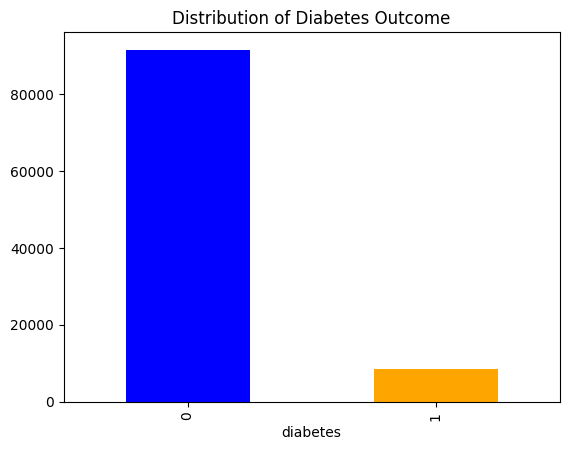

In [110]:
df['diabetes'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Diabetes Outcome')

In [111]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [112]:
dataset=df.copy()

# 

In [113]:
gender_cols = pd.get_dummies(dataset['gender'], prefix='gnd',dtype=int)
dataset = dataset.drop('gender', axis=1)
dataset = pd.concat([dataset, gender_cols], axis=1)


In [114]:
dataset

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gnd_Female,gnd_Male,gnd_Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0,1,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [115]:
smoking_cols = pd.get_dummies(dataset['smoking_history'], prefix='smoking',dtype=int)
dataset = dataset.drop('smoking_history', axis=1)
dataset = pd.concat([dataset, smoking_cols], axis=1)

In [116]:
dataset

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gnd_Female,gnd_Male,gnd_Other,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


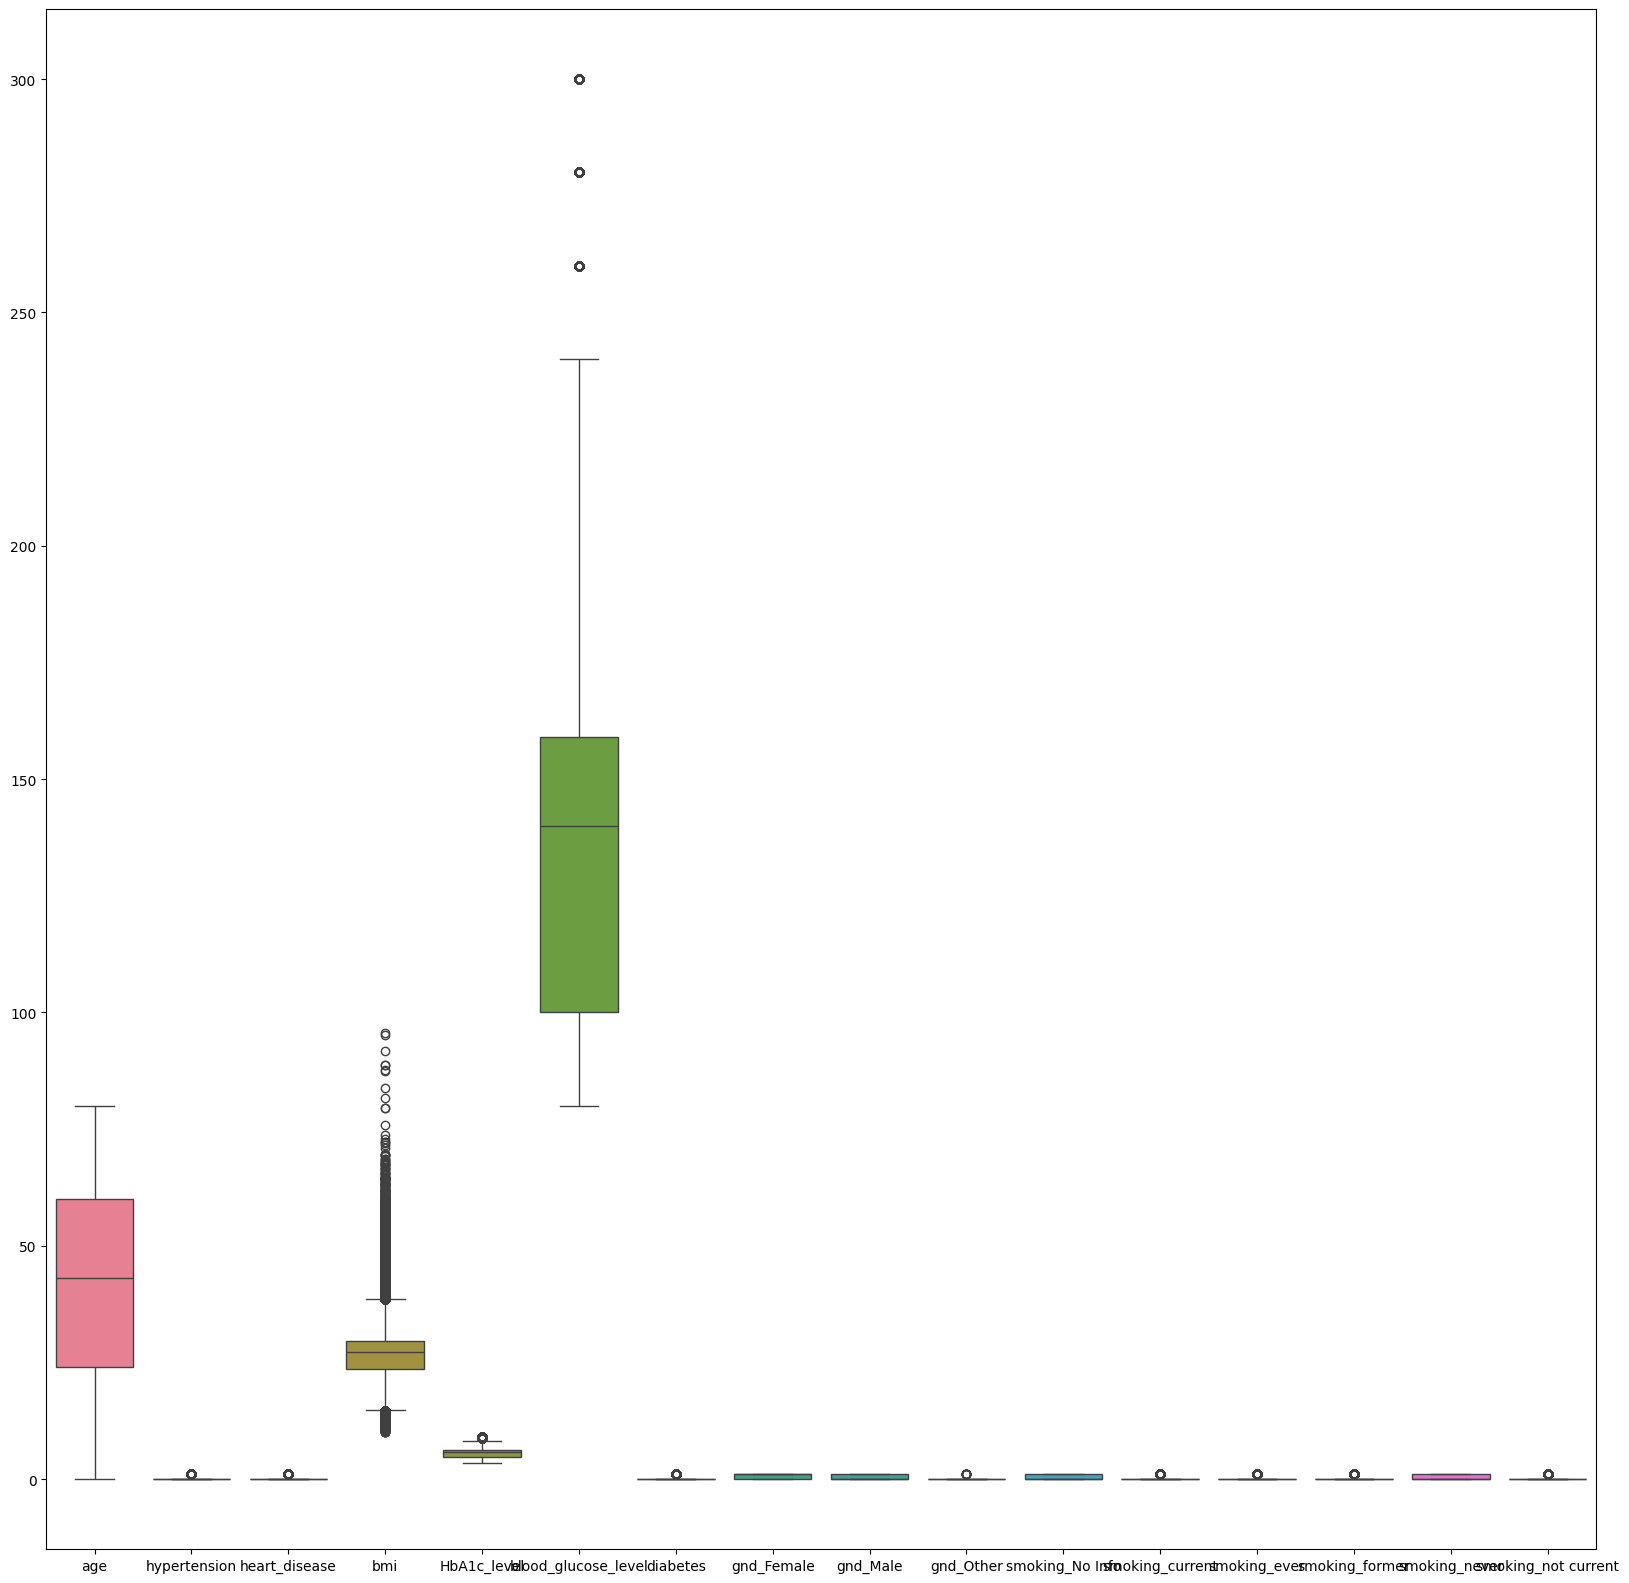

In [117]:
plt.figure(figsize=(20,20))
sns.boxplot(data=dataset)
plt.show()

In [118]:
print(dataset['diabetes'].value_counts())

diabetes
0    91500
1     8500
Name: count, dtype: int64


In [168]:
n = 9000
start = (len(dataset) - n) // 2
end = start + n

subset = dataset[dataset['diabetes'] == 0].iloc[start:end]# Create a balanced dataset by taking the last 12000 samples of the negative class
subset
subset2 = dataset[dataset['diabetes'] == 1]
diabetes_data2 = pd.concat([subset, subset2])
diabetes_data2.info()
diabetes_data2

<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 49811 to 99979
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  17500 non-null  float64
 1   hypertension         17500 non-null  int64  
 2   heart_disease        17500 non-null  int64  
 3   bmi                  17500 non-null  float64
 4   HbA1c_level          17500 non-null  float64
 5   blood_glucose_level  17500 non-null  int64  
 6   diabetes             17500 non-null  int64  
 7   gnd_Female           17500 non-null  int64  
 8   gnd_Male             17500 non-null  int64  
 9   gnd_Other            17500 non-null  int64  
 10  smoking_No Info      17500 non-null  int64  
 11  smoking_current      17500 non-null  int64  
 12  smoking_ever         17500 non-null  int64  
 13  smoking_former       17500 non-null  int64  
 14  smoking_never        17500 non-null  int64  
 15  smoking_not current  17500 non-null  

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gnd_Female,gnd_Male,gnd_Other,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
49811,42.0,0,0,27.32,4.0,126,0,1,0,0,1,0,0,0,0,0
49812,24.0,0,0,26.89,4.8,200,0,0,1,0,0,0,1,0,0,0
49813,60.0,0,0,27.32,6.6,85,0,1,0,0,1,0,0,0,0,0
49814,29.0,0,0,21.17,6.2,140,0,1,0,0,1,0,0,0,0,0
49816,29.0,0,0,27.32,4.8,200,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935,65.0,1,1,33.55,8.2,140,1,1,0,0,0,0,0,0,1,0
99938,55.0,0,1,30.42,6.2,300,1,0,1,0,0,0,0,1,0,0
99957,61.0,0,0,34.45,6.5,280,1,1,0,0,1,0,0,0,0,0
99962,58.0,1,0,38.31,7.0,200,1,1,0,0,0,0,0,0,1,0


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
diabetes_data2  


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gnd_Female,gnd_Male,gnd_Other,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
49811,42.0,0,0,27.32,4.0,126,0,1,0,0,1,0,0,0,0,0
49812,24.0,0,0,26.89,4.8,200,0,0,1,0,0,0,1,0,0,0
49813,60.0,0,0,27.32,6.6,85,0,1,0,0,1,0,0,0,0,0
49814,29.0,0,0,21.17,6.2,140,0,1,0,0,1,0,0,0,0,0
49816,29.0,0,0,27.32,4.8,200,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935,65.0,1,1,33.55,8.2,140,1,1,0,0,0,0,0,0,1,0
99938,55.0,0,1,30.42,6.2,300,1,0,1,0,0,0,0,1,0,0
99957,61.0,0,0,34.45,6.5,280,1,1,0,0,1,0,0,0,0,0
99962,58.0,1,0,38.31,7.0,200,1,1,0,0,0,0,0,0,1,0


In [170]:
# Ver cuántas filas duplicadas hay
duplicados = diabetes_data2.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# Si quieres ver las filas duplicadas:
diabetes_data2[diabetes_data2.duplicated()]

Número de filas duplicadas: 65


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gnd_Female,gnd_Male,gnd_Other,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
51817,42.0,0,0,27.32,6.5,80,0,0,1,0,1,0,0,0,0,0
51853,36.0,0,0,27.32,6.6,130,0,1,0,0,1,0,0,0,0,0
51901,42.0,0,0,27.32,6.5,145,0,1,0,0,1,0,0,0,0,0
51966,80.0,0,0,27.32,4.8,145,0,1,0,0,1,0,0,0,0,0
52100,80.0,0,0,27.32,3.5,145,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95003,80.0,0,0,27.32,5.8,280,1,1,0,0,0,0,0,0,1,0
95203,80.0,0,0,27.32,9.0,220,1,1,0,0,1,0,0,0,0,0
97432,80.0,0,0,27.32,8.2,280,1,1,0,0,0,0,0,0,1,0
99054,53.0,0,0,27.32,9.0,160,1,1,0,0,0,0,0,0,1,0


In [172]:
diabetes_data2 = diabetes_data2.drop_duplicates()

X = diabetes_data2.drop("diabetes", axis=1)
y = diabetes_data2["diabetes"]

In [187]:
print(diabetes_data2[['gnd_Female', 'gnd_Male', 'gnd_Other']].sum())

gnd_Female    9694
gnd_Male      7740
gnd_Other        1
dtype: int64


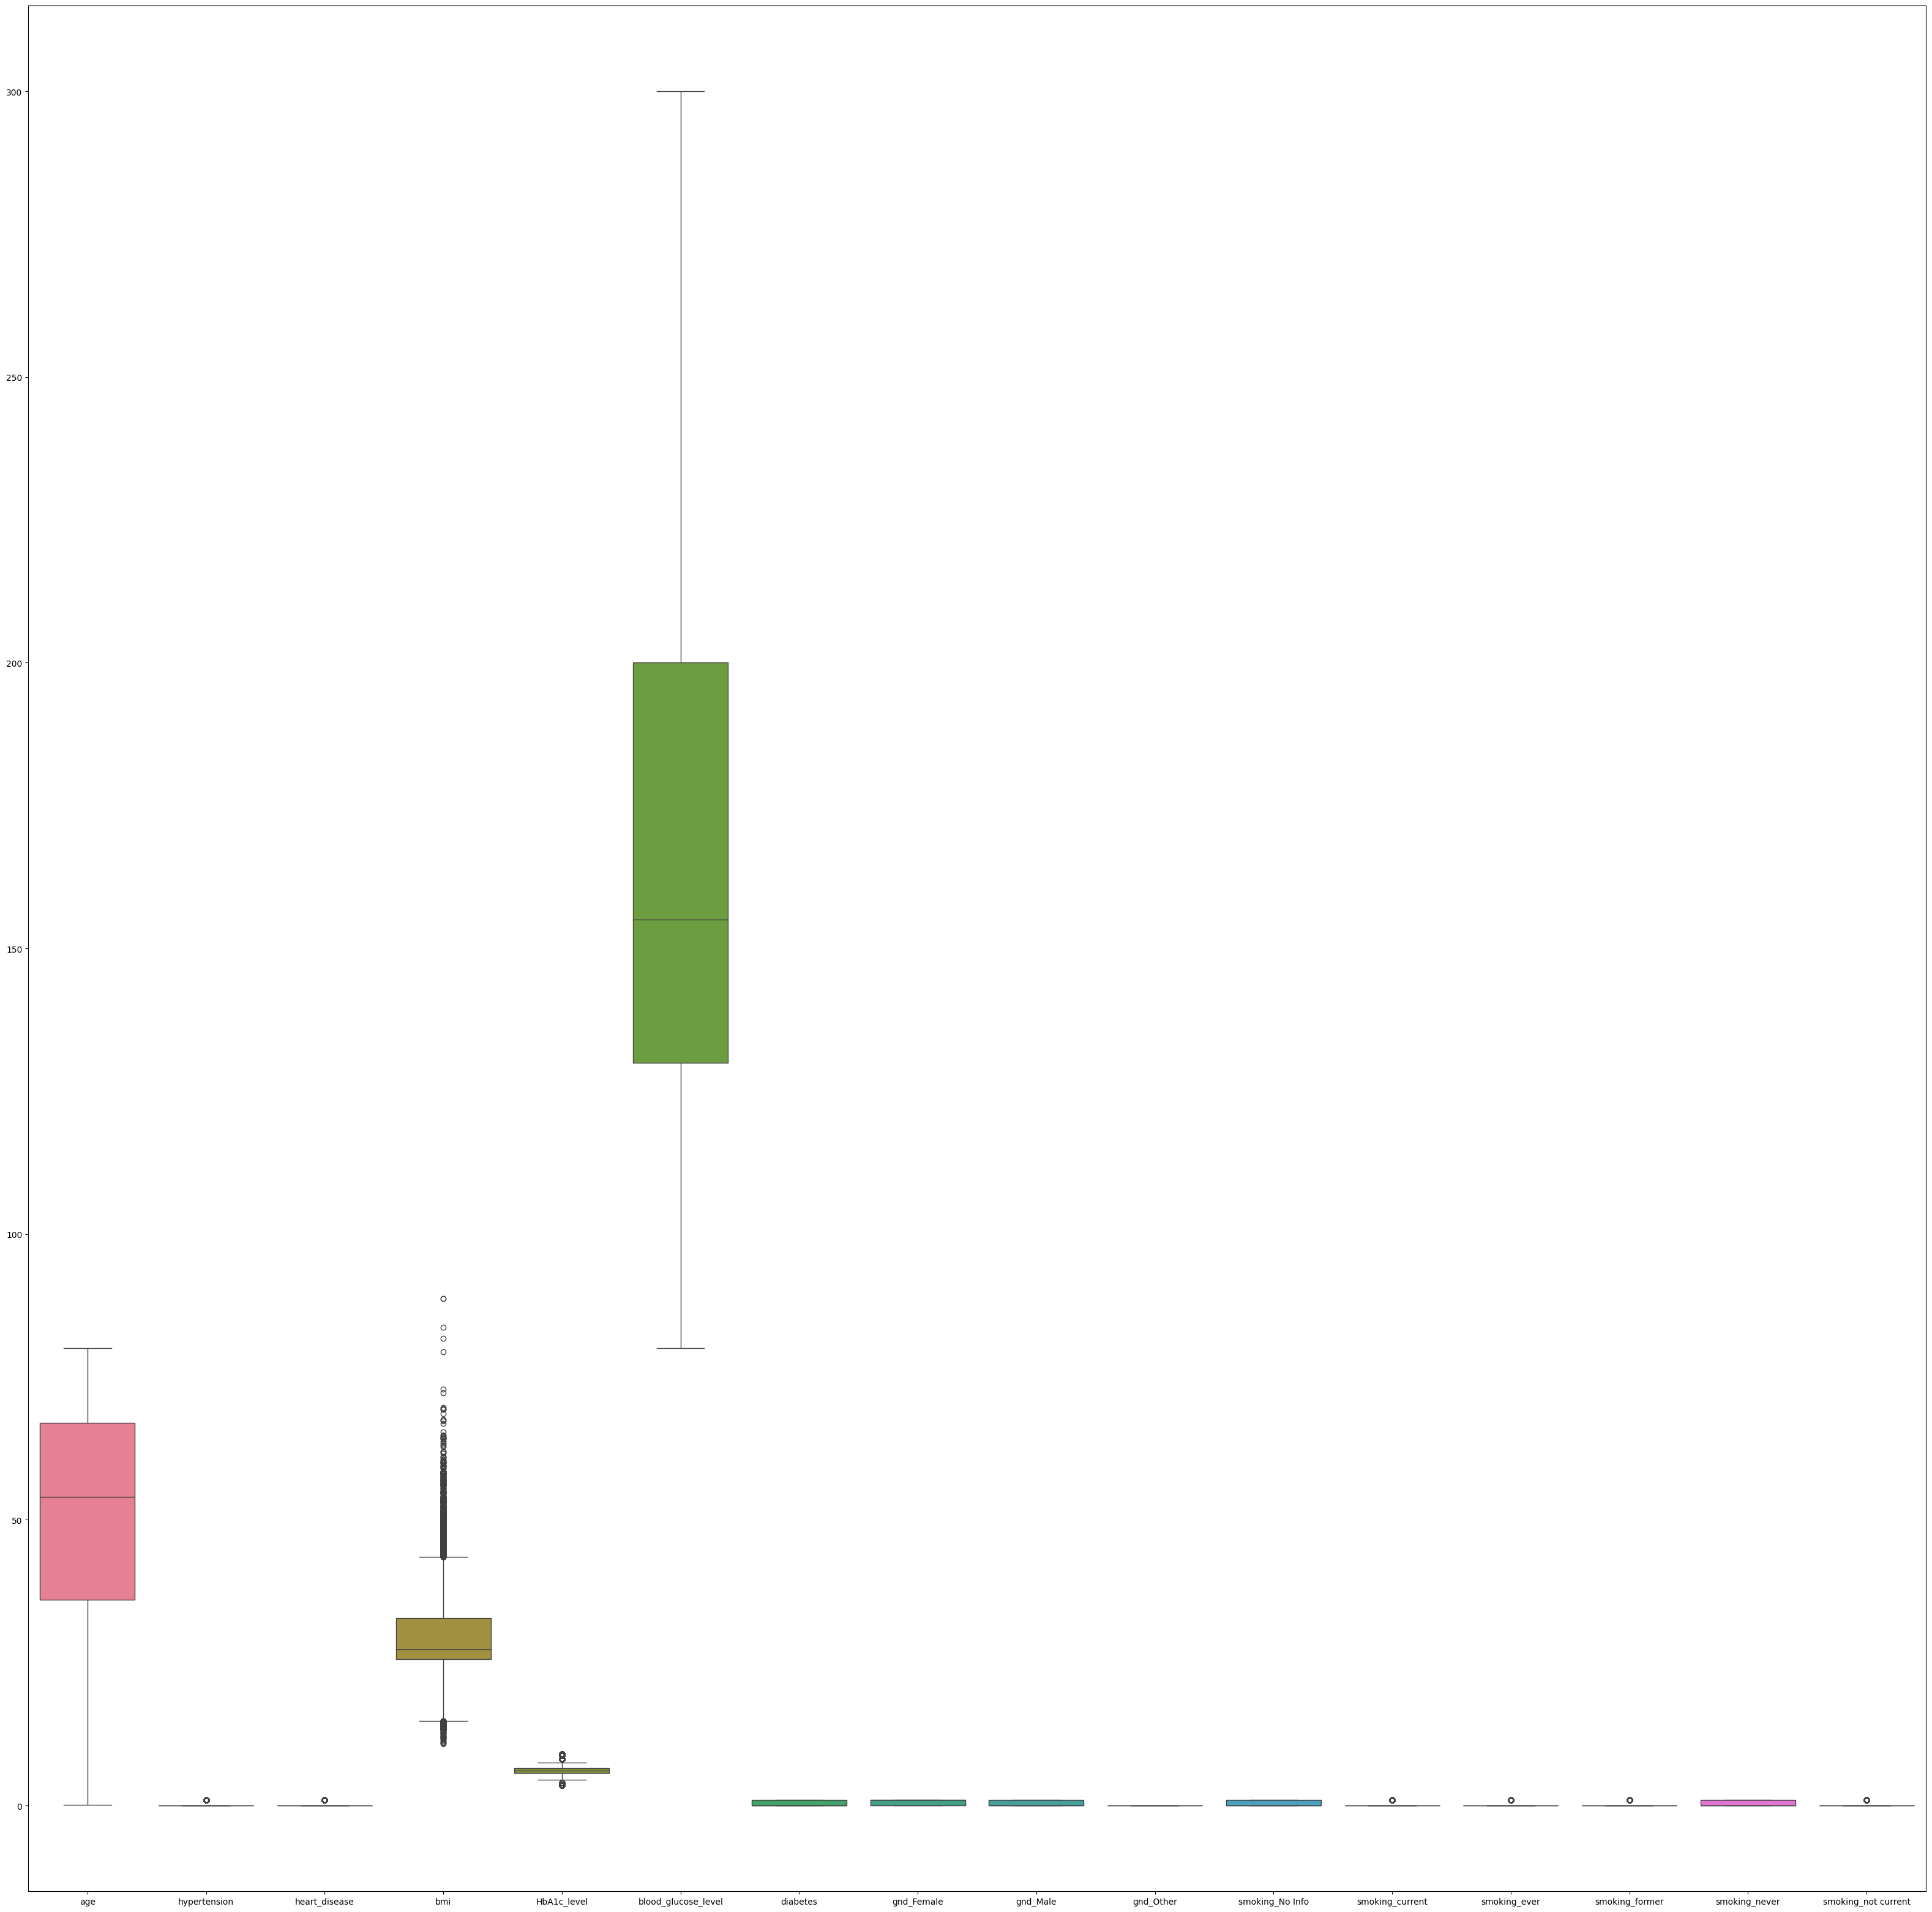

In [134]:
plt.figure(figsize=(40,40))
sns.boxplot(data=diabetes_data2)
plt.show()

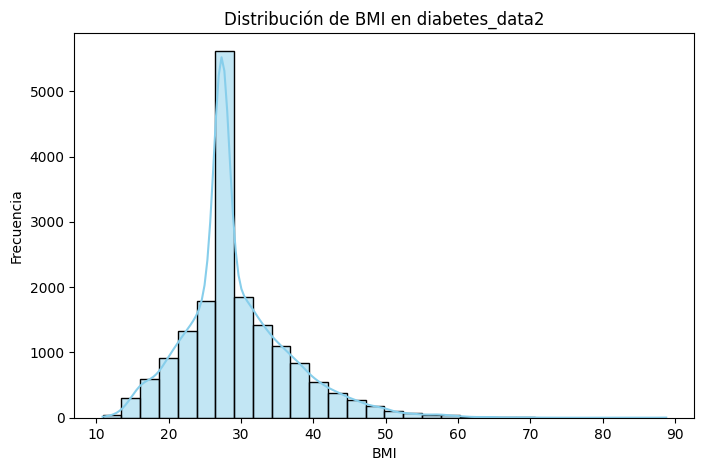

In [135]:
plt.figure(figsize=(8, 5))
sns.histplot(diabetes_data2['bmi'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de BMI en diabetes_data2')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

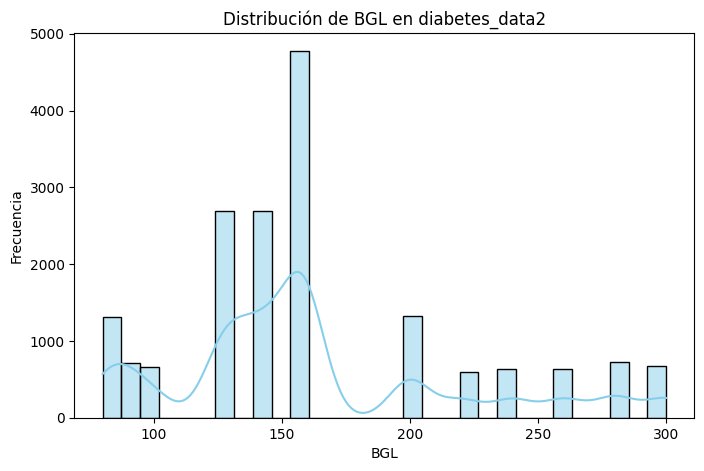

In [136]:
plt.figure(figsize=(8, 5))
sns.histplot(diabetes_data2['blood_glucose_level'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de BGL en diabetes_data2')
plt.xlabel('BGL')
plt.ylabel('Frecuencia')
plt.show()

c:\Users\Lenovo\Desktop\DiabetesPredictorWeb\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MSE: 0.12474906796673359
R2: 0.5004219017393814


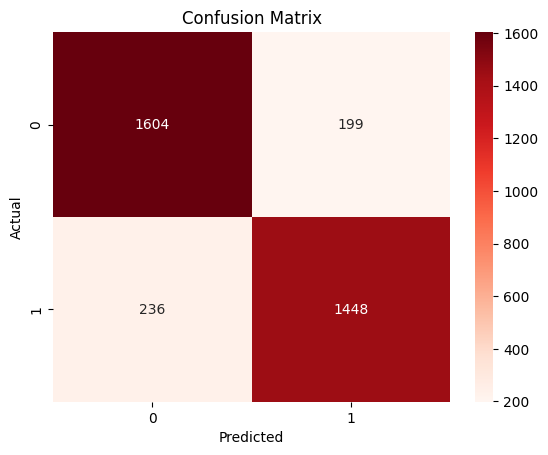

In [173]:


# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2:", metrics.r2_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
dataset.isna().sum()

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
gnd_Female             0
gnd_Male               0
gnd_Other              0
smoking_No Info        0
smoking_current        0
smoking_ever           0
smoking_former         0
smoking_never          0
smoking_not current    0
dtype: int64

In [21]:
dataset.info

<bound method DataFrame.info of         age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  gnd_Female  gnd_Male  gnd_Other  \
0                      140         0           1         0          0   
1                       80         0           1     

Accuracy: 0.8946961894953656

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      2194
           1       0.89      0.87      0.88      1690

    accuracy                           0.89      3884
   macro avg       0.89      0.89      0.89      3884
weighted avg       0.89      0.89      0.89      3884



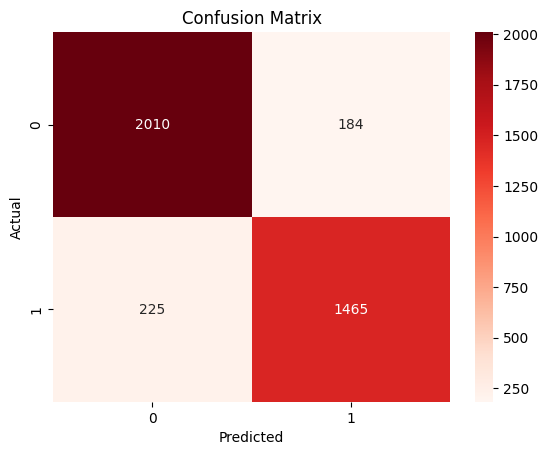

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Classification model
model = RandomForestClassifier(random_state=42 , criterion = 'log_loss' )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




Accuracy: 0.9082305706911386

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      1803
           1       0.91      0.90      0.90      1684

    accuracy                           0.91      3487
   macro avg       0.91      0.91      0.91      3487
weighted avg       0.91      0.91      0.91      3487



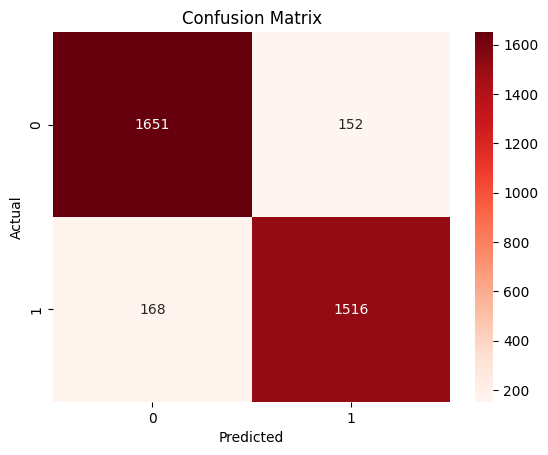

In [177]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Instancia el escalador y ajústalo solo con los datos de entrenamiento
scaler = RobustScaler()
scaler.fit(X_train)

# 2. Transforma los datos de entrenamiento y prueba
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


# 3. Usa los datos escalados para entrenar y evaluar tus modelos
model = RandomForestClassifier(random_state=42, criterion =  'entropy', max_depth= 20, min_samples_leaf= 6, min_samples_split = 14, n_estimators= 240)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# ... el resto de tu código de métricas y visualización ...
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 14, 'n_estimators': 240}
Accuracy: 0.9082305706911386

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      1803
           1       0.91      0.90      0.90      1684

    accuracy                           0.91      3487
   macro avg       0.91      0.91      0.91      3487
weighted avg       0.91      0.91      0.91      3487



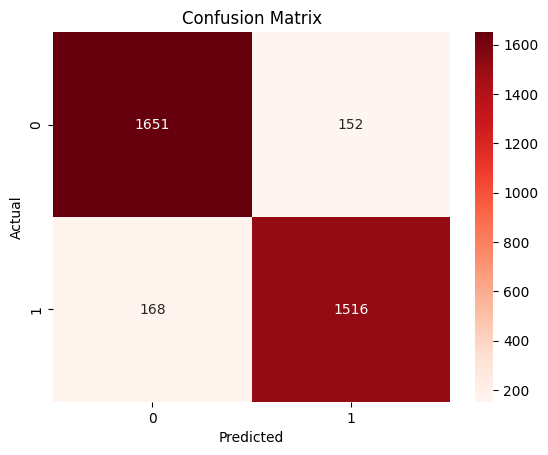

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Instancia el modelo base
rf = RandomForestClassifier(random_state=42)

# Instancia el RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,            # Número de combinaciones a probar
    cv=3,                 # 3-fold cross-validation
    scoring='accuracy',   # Métrica de evaluación
    n_jobs=-1,            # Usa todos los núcleos disponibles
    verbose=5,
    random_state=42
)

# Ajusta el RandomizedSearch a los datos de entrenamiento
random_search.fit(X_train_scaled, y_train)

# Muestra los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Usa el mejor modelo para predecir
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Evalúa el modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy (GradientBoostingClassifier): 0.9148264984227129
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1803
           1       0.91      0.92      0.91      1684

    accuracy                           0.91      3487
   macro avg       0.91      0.91      0.91      3487
weighted avg       0.91      0.91      0.91      3487



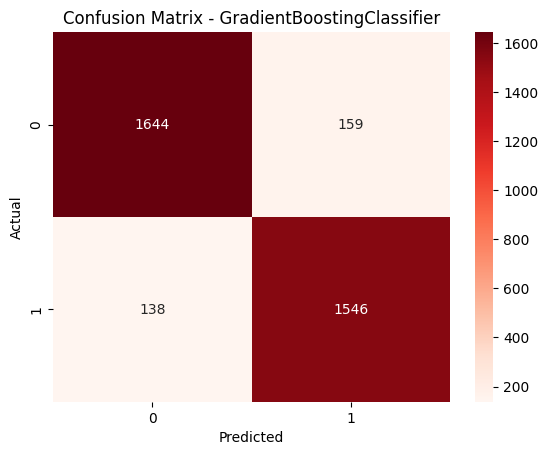

In [218]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=120, learning_rate=0.14, max_depth=5 , min_samples_split = 3 , max_features = 5 )
gb_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluación
print("Accuracy (GradientBoostingClassifier):", metrics.accuracy_score(y_test, y_pred_gb))
print(metrics.classification_report(y_test, y_pred_gb))

conf_mat_gb = metrics.confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_mat_gb, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GradientBoostingClassifier")
plt.show()

Accuracy (StackingClassifier): 0.9136793805563521
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1803
           1       0.91      0.91      0.91      1684

    accuracy                           0.91      3487
   macro avg       0.91      0.91      0.91      3487
weighted avg       0.91      0.91      0.91      3487



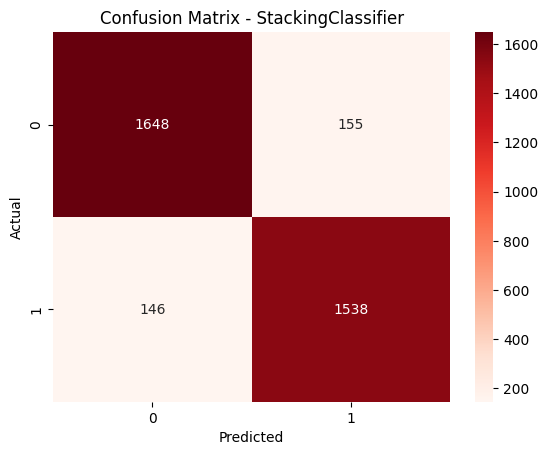

In [180]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
# Definir los clasificadores base con los mejores parámetros conocidos
estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=200,
        min_samples_leaf=4,
        min_samples_split=10,
        random_state=42
    )),
    ('gb', GradientBoostingClassifier(
        random_state=42,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3
    )),
    ('svc', SVC(kernel='linear', probability=True, random_state=42))
]

# Definir el estimador final
final_estimator = LogisticRegression(max_iter=100, random_state=42)

# Crear el modelo StackingClassifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=False,
    n_jobs=-1
)

# Entrenar el modelo
stacking_clf.fit(X_train_scaled, y_train)

# Predecir en el set de prueba
y_pred_stack = stacking_clf.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy (StackingClassifier):", metrics.accuracy_score(y_test, y_pred_stack))
print(metrics.classification_report(y_test, y_pred_stack))

conf_mat_stack = metrics.confusion_matrix(y_test, y_pred_stack)
sns.heatmap(conf_mat_stack, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - StackingClassifier")
plt.show()

Accuracy (GaussianNB): 0.8236306280470318
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1803
           1       0.84      0.78      0.81      1684

    accuracy                           0.82      3487
   macro avg       0.83      0.82      0.82      3487
weighted avg       0.82      0.82      0.82      3487



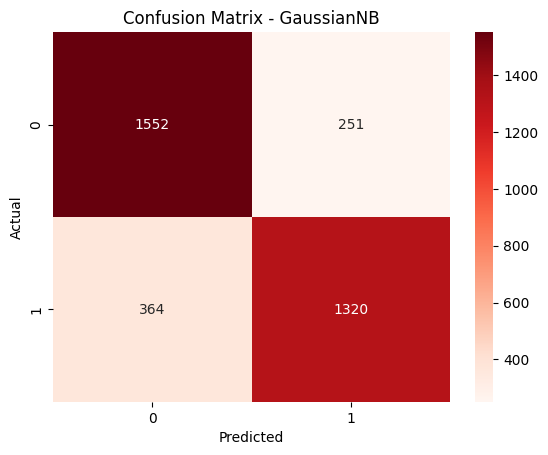

In [201]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenar el modelo GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predicciones
y_pred_gnb = gnb.predict(X_test_scaled)

# Evaluación
print("Accuracy (GaussianNB):", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(conf_mat_gnb, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GaussianNB")
plt.show()

In [219]:
import pickle
import os
with open('../backend/models/diabetes_model_v2.pkl', 'wb') as f:
    pickle.dump(gb_model, f)


with open("../backend/models/scaler_diabetes_model_v2.pkl", "wb") as file:
    pickle.dump(scaler, file)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30264\1404576653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


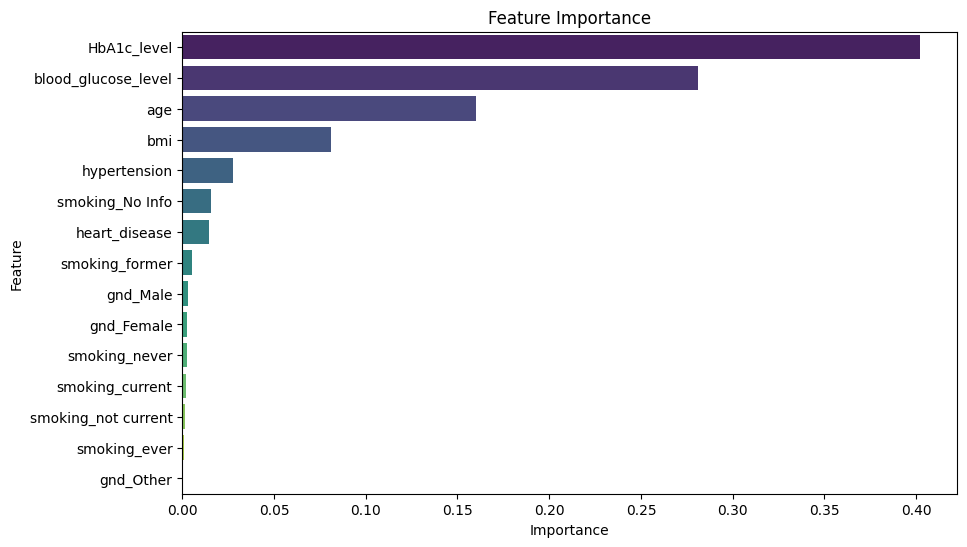

In [206]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

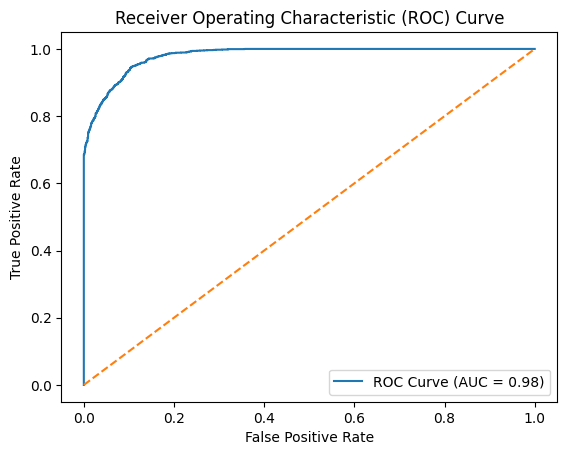

In [205]:
y_probs = gb_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Accuracy (SVC): 0.8882926829268293
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2406
           1       0.89      0.83      0.86      1694

    accuracy                           0.89      4100
   macro avg       0.89      0.88      0.88      4100
weighted avg       0.89      0.89      0.89      4100



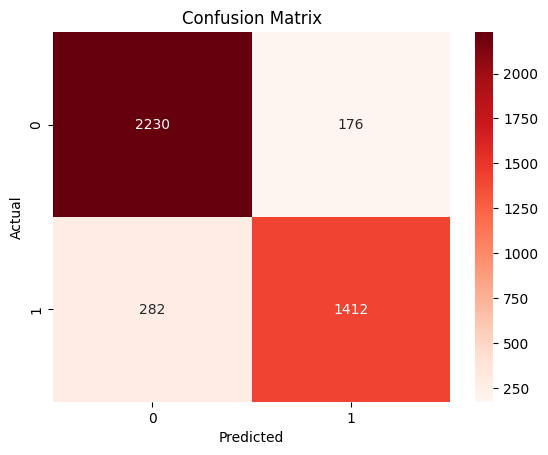

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Entrenar el modelo SVC
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train, y_train)

# Predicciones
y_pred_svc = svc.predict(X_test)

# Evaluación
print("Accuracy (SVC):", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

conf_mat = metrics.confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()